In [1]:
from datetime import datetime
import time 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
folder_path = "Inertia_Sensors_Dataset/"
file_name = 'Cycling.csv'
file_path = folder_path + file_name

df1 = pd.read_csv(file_path)

print(f"Number of rows: {len(df1)}")
print(f"Number of columns: {len(df1.columns)}")

print("\nData from", file_name)
print(df1)

Number of rows: 6764
Number of columns: 14

Data from Cycling.csv
      ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
0                    -0.8857                 -0.9150                  9.5503   
1                    -0.8139                  1.2541                  9.4306   
2                   -10.2466                -11.1079                 16.0610   
3                    -4.3679                 -7.6616                 -4.6180   
4                     5.0936                 -7.1863                 -5.2249   
...                      ...                     ...                     ...   
6759                 -0.4840                  3.7880                  9.0860   
6760                 -0.5240                  3.7680                 10.5250   
6761                 -2.3920                  3.8880                  7.9610   
6762                  0.6390                  2.4130                  8.1930   
6763                  1.5560                  3.5080  

In [3]:
print(df1.columns)

Index(['ACCELEROMETER X (m/s²)', 'ACCELEROMETER Y (m/s²)',
       'ACCELEROMETER Z (m/s²)', 'GRAVITY X (m/s²)', 'GRAVITY Y (m/s²)',
       'GRAVITY Z (m/s²)', 'LINEAR ACCELERATION X (m/s²)',
       'LINEAR ACCELERATION Y (m/s²)', 'LINEAR ACCELERATION Z (m/s²)',
       'GYROSCOPE X (rad/s)', 'GYROSCOPE Y (rad/s)', 'GYROSCOPE Z (rad/s)',
       'Time since start in ms ', 'YYYY-MO-DD HH-MI-SS_SSS'],
      dtype='object')


Missing values in each column:
ACCELEROMETER X (m/s²)          0
ACCELEROMETER Y (m/s²)          0
ACCELEROMETER Z (m/s²)          0
GRAVITY X (m/s²)                0
GRAVITY Y (m/s²)                0
GRAVITY Z (m/s²)                0
LINEAR ACCELERATION X (m/s²)    0
LINEAR ACCELERATION Y (m/s²)    0
LINEAR ACCELERATION Z (m/s²)    0
GYROSCOPE X (rad/s)             0
GYROSCOPE Y (rad/s)             0
GYROSCOPE Z (rad/s)             0
Time since start in ms          0
YYYY-MO-DD HH-MI-SS_SSS         0
dtype: int64

Descriptive statistics:
       ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
count             6764.000000             6764.000000             6764.000000   
mean                -2.089044                0.603412               -3.398616   
std                  6.171541                7.283687                3.725064   
min                -25.096000              -43.865200              -32.346000   
25%                 -6.482250               -5.890

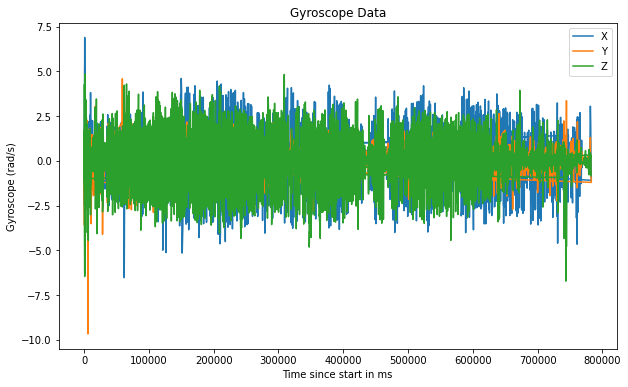

In [4]:
import matplotlib.pyplot as plt

folder_path = "Inertia_Sensors_Dataset/"
file_name = 'Cycling.csv'
file_path = folder_path + file_name

df1 = pd.read_csv(file_path)

print("Missing values in each column:")
print(df1.isnull().sum())

print("\nDescriptive statistics:")
print(df1.describe())

plt.figure(figsize=(10, 6))
plt.plot(df1['Time since start in ms '], df1['GYROSCOPE X (rad/s)'], label='X')
plt.plot(df1['Time since start in ms '], df1['GYROSCOPE Y (rad/s)'], label='Y')
plt.plot(df1['Time since start in ms '], df1['GYROSCOPE Z (rad/s)'], label='Z')
plt.xlabel('Time since start in ms')
plt.ylabel('Gyroscope (rad/s)')
plt.title('Gyroscope Data')
plt.legend()
plt.show()

In [5]:
folder_path = "Inertia_Sensors_Dataset/"
file_name = 'Cycling.csv'
file_path = folder_path + file_name

df1 = pd.read_csv(file_path)

df1['Timestamp (microseconds)'] = pd.to_datetime(df1['YYYY-MO-DD HH-MI-SS_SSS'], format='%Y-%m-%d %H:%M:%S:%f').values.astype(np.int64) // 1000

df1.drop(columns=['YYYY-MO-DD HH-MI-SS_SSS'], inplace=True)

print("Missing values in each column:")
print(df1.isnull().sum())

print("\nDescriptive statistics:")
print(df1.describe())

Missing values in each column:
ACCELEROMETER X (m/s²)          0
ACCELEROMETER Y (m/s²)          0
ACCELEROMETER Z (m/s²)          0
GRAVITY X (m/s²)                0
GRAVITY Y (m/s²)                0
GRAVITY Z (m/s²)                0
LINEAR ACCELERATION X (m/s²)    0
LINEAR ACCELERATION Y (m/s²)    0
LINEAR ACCELERATION Z (m/s²)    0
GYROSCOPE X (rad/s)             0
GYROSCOPE Y (rad/s)             0
GYROSCOPE Z (rad/s)             0
Time since start in ms          0
Timestamp (microseconds)        0
dtype: int64

Descriptive statistics:
       ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
count             6764.000000             6764.000000             6764.000000   
mean                -2.089044                0.603412               -3.398616   
std                  6.171541                7.283687                3.725064   
min                -25.096000              -43.865200              -32.346000   
25%                 -6.482250               -5.890

In [6]:
pd.Timestamp(df1['Timestamp (microseconds)'][0], unit='us')

Timestamp('2021-03-19 12:15:58.176000')

In [7]:
folder_path = "Inertia_Sensors_Dataset/"
file_name = 'Cycling.csv'
file_path = folder_path + file_name

df1 = pd.read_csv(file_path)

print("Original DataFrame:")
print(df1.head())

df1['Timestamp (microseconds)'] = pd.to_datetime(df1['YYYY-MO-DD HH-MI-SS_SSS'], format='%Y-%m-%d %H:%M:%S:%f').view(np.int64) // 1000

print("\nDataFrame with converted timestamps:")
print(df1[['YYYY-MO-DD HH-MI-SS_SSS', 'Timestamp (microseconds)']].head())

df1.drop(columns=['YYYY-MO-DD HH-MI-SS_SSS'], inplace=True)

start = pd.Timestamp(year=2021, month=2, day=19, hour=23, minute=34, second=25, microsecond=292000)
start_ts = int(start.timestamp() * 1e6)

end = pd.Timestamp(year=2021, month=5, day=19, hour=23, minute=35, second=27, microsecond=728000)
end_ts = int(end.timestamp() * 1e6)

DF1 = df1.loc[(df1['Timestamp (microseconds)'] >= start_ts) & (df1['Timestamp (microseconds)'] <= end_ts)]

DF1['Activity_Label'] = 'Cycling'

DF1 = DF1[['Timestamp (microseconds)', 'GYROSCOPE X (rad/s)', 'GYROSCOPE Y (rad/s)', 'GYROSCOPE Z (rad/s)', 'Activity_Label']]
DF1 = DF1.rename(columns={
    'GYROSCOPE X (rad/s)': 'Gyro X (°/s)',
    'GYROSCOPE Y (rad/s)': 'Gyro Y (°/s)',
    'GYROSCOPE Z (rad/s)': 'Gyro Z (°/s)'
})

DF1.reset_index(drop=True, inplace=True)

print("\nFiltered DataFrame with index column:")
print(DF1)

Original DataFrame:
   ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
0                 -0.8857                 -0.9150                  9.5503   
1                 -0.8139                  1.2541                  9.4306   
2                -10.2466                -11.1079                 16.0610   
3                 -4.3679                 -7.6616                 -4.6180   
4                  5.0936                 -7.1863                 -5.2249   

   GRAVITY X (m/s²)  GRAVITY Y (m/s²)  GRAVITY Z (m/s²)  \
0           -1.1034           -0.0603            9.7442   
1           -0.5532            1.0615            9.7333   
2            0.9801            6.8492           -6.9497   
3            3.5523           -8.1039           -4.2283   
4            4.0020           -8.0153           -3.9886   

   LINEAR ACCELERATION X (m/s²)  LINEAR ACCELERATION Y (m/s²)  \
0                       -0.6645                        0.8831   
1                       -1.8757 

/tmp/ipykernel_8410/3250797522.py:10: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df1['Timestamp (microseconds)'] = pd.to_datetime(df1['YYYY-MO-DD HH-MI-SS_SSS'], format='%Y-%m-%d %H:%M:%S:%f').view(np.int64) // 1000


In [8]:
output_file_path = "Final_Cleaned_Cycling_Gyro.csv"
DF1.to_csv(output_file_path, index=False)

print(f"Filtered DataFrame saved to {output_file_path}")

Filtered DataFrame saved to Final_Cleaned_Cycling_Gyro.csv


In [9]:
filtered_df = pd.read_csv("Final_Cleaned_Cycling_Gyro.csv")

filtered_df.reset_index(drop=True, inplace=True)

print("\nLoaded DataFrame with numerical index and Timestamp (microseconds):")
print(filtered_df)


Loaded DataFrame with numerical index and Timestamp (microseconds):
      Timestamp (microseconds)  Gyro X (°/s)  Gyro Y (°/s)  Gyro Z (°/s)  \
0             1616156158176000       -1.0842       -1.7585        0.1958   
1             1616156158676000        0.2783       -0.5358        1.6936   
2             1616156159175000       -1.0009       -2.9897       -6.4581   
3             1616156159676000        0.0703       -0.1928       -0.3580   
4             1616156160176000       -0.4245        0.0546        0.3329   
...                        ...           ...           ...           ...   
6759          1621448055976000       -0.0970        0.5970        0.8170   
6760          1621448056476000        0.6150       -0.0640        0.1030   
6761          1621448056976000       -0.6980       -0.1530       -0.4050   
6762          1621448057476000        0.0350       -0.3340        1.0930   
6763          1621448057976000       -0.7060        0.2240       -0.3680   

     Activity_Labe